In [ ]:
import random
import time
import numpy as np
from matplotlib import pyplot as d



def main():

    matrix_sizes=list(range(100,1001,100))
    my_calculation_time_list=[]
    numpy_time_list=[]
    
    print("Task 1b) My matrix multiplication algorithm has time complexity O(n^3),")
    print("which means that if the Matrix size is doubled, the time taken for the computation is roughly 2^3 times as long.")
    print("\n")
    for n in matrix_sizes:
        a=create_matrix(n)
        b=create_matrix(n)

        r=get_calculation_time(a,b,n)
        my_calculation_time_list.append(r)
        
        f=get_numpy_time(a,b)
        numpy_time_list.append(f)

    print("\n")
    print("Task 1c) This is the plot to compare the NumPy and my algorithms runtime as the Matrix size increases.")
    plot_multiplication_times(numpy_time_list,my_calculation_time_list,matrix_sizes)
    plot_numpy_time(matrix_sizes,numpy_time_list)
    print("Task 1d) My algorithm and NumPy both have time complexity O(n^3). Numpy is much more efficient,")
    print("because it uses highly optimized libraries such as (BLAS and LAPACK). This allows numpy to execute")
    print("Matrix multiplication significantly faster than my implementation, eventough they bouth have time complexity O(n^3)")
    print("\n")

    #task 1e)
    strassen_not_recursive_time=[]
    strassen_recursive_time=[]
    my_algorithm_two_x_two=[]
    numpy_two_x_two=[]

    l=list(range(100,3001,100))
    for u in l:

        size=2
        
        i=create_matrix(size)
        k=create_matrix(size)

        start=time.time()
        for x in range(u):
            strassen_not_recursive(i,k)
        stop=time.time()
        h=stop-start
        strassen_not_recursive_time.append(h)

        start=time.time()
        for x in range(u):
            multiply_matrices(i,k,size)
        stop=time.time()
        h=stop-start
        my_algorithm_two_x_two.append(h)

        start=time.time()
        for x in range(u):
            np.dot(i,k)
        stop=time.time()
        s=stop-start
        numpy_two_x_two.append(s)

        start=time.time()
        for x in range(u):
            strassen_recursive(i,k)
        stop=time.time()
        s=stop-start
        strassen_recursive_time.append(s)

    average_strassen_not_recursive=sum(strassen_not_recursive_time)/ len(strassen_not_recursive_time)
    average_strassen_recursive=sum(strassen_recursive_time)/len(strassen_recursive_time)
    average_my_algorithm=sum(my_algorithm_two_x_two)/len(my_algorithm_two_x_two)
    average_numpy_time=sum(numpy_two_x_two)/len(numpy_two_x_two)
    
    
    print("Task 1e) This plot compares the matrix multiplication time on 2x2 matrices")
    plot_two_x_two_times(l,numpy_two_x_two,my_algorithm_two_x_two,strassen_not_recursive_time,strassen_recursive_time)
    print("The fluctuations in computation time are probably depending on factors like how the computer handles memory and other background processes.")
    print("We havent covered these topics yet, so I cant explain the exact reasons for these fluctuations.")
    print("\n")

    print("Comparison of the average computation time for each algorithm on 2x2 matrices, for up to 3000 repetitions:")
    print("\n")

    print(f"NumPy's average time for 2x2 matrix computation: {average_numpy_time}")
    print(f"My algorithm's average time for 2x2 matrix computation: {average_my_algorithm}")
    print(f"Strassen not recursive average time for 2x2 matrix computation: {average_strassen_not_recursive}")
    print(f"Strassen recursive average time for 2x2 matrix computation: {average_strassen_recursive}")
    print("\n")
    
    print("1. The Strassen non recursive algorithm is the fastest")
    print("2. My algorithm is the second fastest on 2x2 matrices")
    print("3. Numpy and the recursive Strassen algorithm are almost equally fast.")
    print("4.The recursive strassen algorithm is less efficient than the not recursive algorithm on 2x2 matrices.")




    


In [30]:
########
# Task 1a) Implementing the standard matrix multiplication algorithm.
########

def create_matrix(n):

    whole_matrix=[]
    for x in range(n):
        matrix_line=[]
        whole_matrix.append(matrix_line)
        for x in range(n):
            rndom_number=random.randint(1,9)
            matrix_line.append(rndom_number)
       
    return whole_matrix

def multiply_matrices(a,b,n):

    result_matrix=[]
    for i in range(n):
        l=[0 for x in range(n)]
        result_matrix.append(l)
    for f in range(n):#loop through the rows in a
        for x in range(n):#loop throug columns of b
            sum=0
            for g in range(n):#loop trhoug elements in rows and columns

               sum+=a[f][g]*b[g][x]
            result_matrix[f][x]=sum
    return result_matrix

In [31]:
#######
# Task 1b) Benchmarking the runtime of my algorithm
#######

def get_calculation_time(a,b,n):

    start = time.time()
    multiply_matrices(a,b,n)
    stop= time.time()

    time_for_calculation= stop-start

    print(f"Matrix multiplication time for {n}x{n} matrices using my algorithm: {time_for_calculation} seconds")
    return time_for_calculation



In [32]:
########
# Task 1c) Comparing my implementation with the built in matrix multiplication in NumPy
########

def get_numpy_time(a,b):
    numpy_time_list=[]
    start=time.time()
    c=np.dot(a,b)
    stop=time.time()
    numpy_time=stop-start
    return numpy_time


def plot_multiplication_times(numpy_time,calculation_time_list,matrix_sizes):

    d.plot(matrix_sizes,numpy_time,marker='o',color='green',label=" numpy")
    d.plot(matrix_sizes,calculation_time_list, marker='o',color='red',label="my algorithm")
    
    
    d.xlabel("matrix dimension")
    d.ylabel("time in seconds")
    d.title("matrix multiplication times for increasing dimensions")
    d.legend()

    d.show(block=True)

def plot_numpy_time(matrix_sizes,numpy_time_list):
    d.plot(matrix_sizes,numpy_time_list,marker='o',color='green',label=" numpy")
    d.xlabel("matrix dimension")
    d.ylabel("time in seconds")
    d.title("numpy time for increasing dimensions")
    d.legend()
    d.show(block=True)


In [33]:
########
# Task 1e) Strassen algorithm without recursion for 2x2 Matrices
########

def strassen_not_recursive(a,b):

    a11=a[0][0]
    a12=a[0][1]
    a21=a[1][0]
    a22=a[1][1]

    b11=b[0][0]
    b12=b[0][1]
    b21=b[1][0]
    b22=b[1][1]

    M1=(a11+a22)*(b11+b22)
    M2=(a21+a22)*b11
    M3=(a11*(b12-b22))
    M4=a22*(b21-b11)
    M5=(a11+a12)*b22
    M6=(a21-a11)*(b11+b12)
    M7=(a12-a22)*(b21+b22)

    x=M1+M4-M5+M7
    y=M3+M5
    z=M2+M4
    f=M1-M2+M3+M6

    
    return [[x,y],[z,f]]

In [34]:
########
# Task 1e) Strassen algorithm with recursion for 2x2 Matrices.
########

def subtract_matrices(a,b):

    n=len(a)
    result=[a[0]-b[0]]
    return result

def add_matrices(a,b):

    n=len(a)
    result=[a[0]+b[0]]
    return result

def strassen_recursive(a,b):

    if len(a)==1:
        return a[0]*b[0]

    a11=a[0][0]
    a12=a[0][1]
    a21=a[1][0]
    a22=a[1][1]

    b11=b[0][0]
    b12=b[0][1]
    b21=b[1][0]
    b22=b[1][1]

    M1=strassen_recursive(add_matrices([a11], [a22]), add_matrices([b11], [b22]))
    M2=strassen_recursive(add_matrices([a21], [a22]), [b11])
    M3=strassen_recursive([a11], subtract_matrices([b12], [b22]))
    M4=strassen_recursive([a22], subtract_matrices([b21], [b11]))
    M5=strassen_recursive(add_matrices([a11], [a12]), [b22])
    M6=strassen_recursive(subtract_matrices([a21], [a11]), add_matrices([b11], [b12]))
    M7=strassen_recursive(subtract_matrices([a12], [a22]), add_matrices([b21], [b22]))
    
    x=M1+M4-M5+M7
    y=M3+M5
    z=M2+M4
    f=M1-M2+M3+M6

    
    return [[x,y],[z,f]]

Task 1b) My matrix multiplication algorithm has time complexity O(n^3),
which means that if the Matrix size is doubled, the time taken for the computation is roughly 2^3 times as long.


Matrix multiplication time for 100x100 matrices using my algorithm: 0.09163546562194824 seconds
Matrix multiplication time for 200x200 matrices using my algorithm: 1.4894001483917236 seconds
Matrix multiplication time for 300x300 matrices using my algorithm: 3.7762234210968018 seconds
Matrix multiplication time for 400x400 matrices using my algorithm: 9.854597330093384 seconds
Matrix multiplication time for 500x500 matrices using my algorithm: 17.369292736053467 seconds
Matrix multiplication time for 600x600 matrices using my algorithm: 35.71928858757019 seconds
Matrix multiplication time for 700x700 matrices using my algorithm: 89.72885179519653 seconds
Matrix multiplication time for 800x800 matrices using my algorithm: 130.0800702571869 seconds
Matrix multiplication time for 900x900 matrices using my

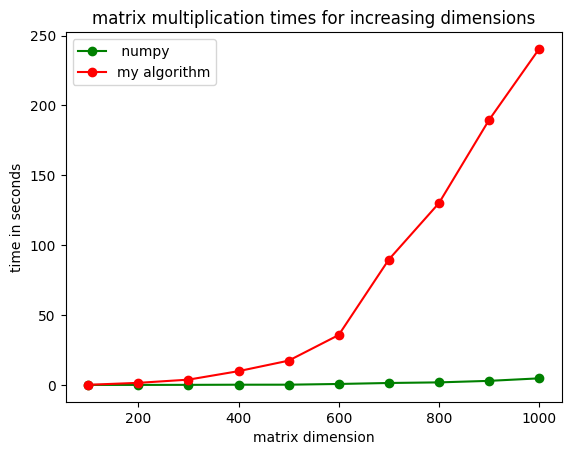

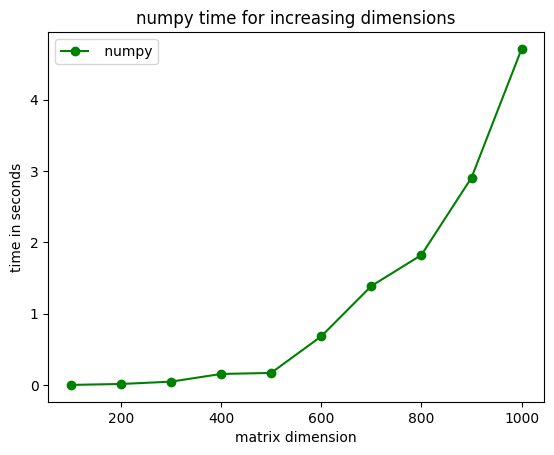

Task 1d) My algorithm and NumPy both have time complexity O(n^3). Numpy is much more efficient,
because it uses highly optimized libraries such as (BLAS and LAPACK). This allows numpy to execute
Matrix multiplication significantly faster than my implementation, eventough they bouth have time complexity O(n^3)


Task 1e) This plot compares the matrix multiplication time on 2x2 matrices


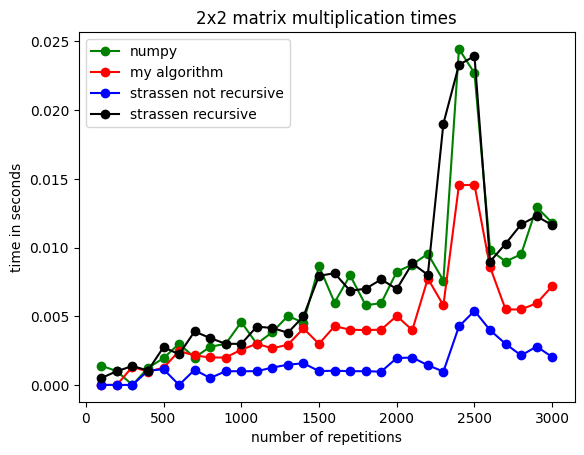

The fluctuations in computation time are probably depending on factors like how the computer handles memory and other background processes.
We havent covered these topics yet, so I cant explain the exact reasons for these fluctuations.


Comparison of the average computation time for each algorithm on 2x2 matrices, for up to 3000 repetitions:


NumPy's average time for 2x2 matrix computation: 0.006867257754007975
My algorithm's average time for 2x2 matrix computation: 0.004368726412455241
Strassen not recursive average time for 2x2 matrix computation: 0.0015349626541137696
Strassen recursive average time for 2x2 matrix computation: 0.007397286097208659


1. The Strassen non recursive algorithm is the fastest
2. My algorithm is the second fastest on 2x2 matrices
3. Numpy and the recursive Strassen algorithm are almost equally fast.
4.The recursive strassen algorithm is less efficient than the not recursive algorithm on 2x2 matrices.


In [35]:
#######
# Task 1e) Comparing Strassen algorithm with and without recursion, Numpy and my own algorithms runtime for 2x2 Matrices.
#######

def plot_two_x_two_times(x,numpy_two_x,my_algorithm_two,strassen_time,strassen_recursive_time):

    d.plot(x,numpy_two_x,marker='o',color='green',label="numpy")
    d.plot(x,my_algorithm_two, marker='o',color='red',label="my algorithm")
    d.plot(x,strassen_time,marker='o',color='blue',label="strassen not recursive")
    d.plot(x,strassen_recursive_time,marker='o',color='black',label="strassen recursive")
    
    
    d.xlabel("number of repetitions")
    d.ylabel("time in seconds")
    d.title("2x2 matrix multiplication times")
    d.legend()


    d.show(block=True)



main()